# Importing Library


In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing 
import warnings
warnings.filterwarnings("ignore")

# Reading The Data Set


In [78]:
air= pd.read_excel("Airlines+Data.xlsx",sheet_name='Sheet1')

air= air.set_index('Month')
air.head

<bound method NDFrame.head of             Passengers
Month                 
1995-01-01         112
1995-02-01         118
1995-03-01         132
1995-04-01         129
1995-05-01         121
...                ...
2002-08-01         405
2002-09-01         355
2002-10-01         306
2002-11-01         271
2002-12-01         306

[96 rows x 1 columns]>

In [4]:
air.index

DatetimeIndex(['1995-01-01', '1995-02-01', '1995-03-01', '1995-04-01',
               '1995-05-01', '1995-06-01', '1995-07-01', '1995-08-01',
               '1995-09-01', '1995-10-01', '1995-11-01', '1995-12-01',
               '1996-01-01', '1996-02-01', '1996-03-01', '1996-04-01',
               '1996-05-01', '1996-06-01', '1996-07-01', '1996-08-01',
               '1996-09-01', '1996-10-01', '1996-11-01', '1996-12-01',
               '1997-01-01', '1997-02-01', '1997-03-01', '1997-04-01',
               '1997-05-01', '1997-06-01', '1997-07-01', '1997-08-01',
               '1997-09-01', '1997-10-01', '1997-11-01', '1997-12-01',
               '1998-01-01', '1998-02-01', '1998-03-01', '1998-04-01',
               '1998-05-01', '1998-06-01', '1998-07-01', '1998-08-01',
               '1998-09-01', '1998-10-01', '1998-11-01', '1998-12-01',
               '1999-01-01', '1999-02-01', '1999-03-01', '1999-04-01',
               '1999-05-01', '1999-06-01', '1999-07-01', '1999-08-01',
      

# Assigning Frequency To Datetimeindex


In [5]:

air.index.freq = 'MS' 

In [6]:
air.index

DatetimeIndex(['1995-01-01', '1995-02-01', '1995-03-01', '1995-04-01',
               '1995-05-01', '1995-06-01', '1995-07-01', '1995-08-01',
               '1995-09-01', '1995-10-01', '1995-11-01', '1995-12-01',
               '1996-01-01', '1996-02-01', '1996-03-01', '1996-04-01',
               '1996-05-01', '1996-06-01', '1996-07-01', '1996-08-01',
               '1996-09-01', '1996-10-01', '1996-11-01', '1996-12-01',
               '1997-01-01', '1997-02-01', '1997-03-01', '1997-04-01',
               '1997-05-01', '1997-06-01', '1997-07-01', '1997-08-01',
               '1997-09-01', '1997-10-01', '1997-11-01', '1997-12-01',
               '1998-01-01', '1998-02-01', '1998-03-01', '1998-04-01',
               '1998-05-01', '1998-06-01', '1998-07-01', '1998-08-01',
               '1998-09-01', '1998-10-01', '1998-11-01', '1998-12-01',
               '1999-01-01', '1999-02-01', '1999-03-01', '1999-04-01',
               '1999-05-01', '1999-06-01', '1999-07-01', '1999-08-01',
      

# Performing EDA

In [7]:
air.columns

Index(['Passengers'], dtype='object')

In [8]:
air

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


In [9]:
air.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 1995-01-01 to 2002-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  96 non-null     int64
dtypes: int64(1)
memory usage: 1.5 KB


In [10]:
air.isna().value_counts()

Passengers
False         96
dtype: int64

In [11]:
air.shape

(96, 1)

In [13]:
air.shape

(96, 1)

In [14]:
air.dtypes

Passengers    int64
dtype: object

#  Visualizing plots and understanding the Time Series

# Line Plot


<AxesSubplot:xlabel='Month'>

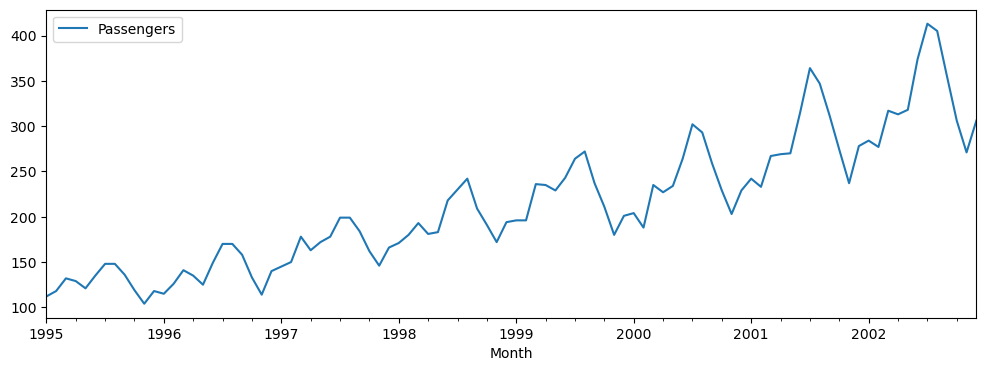

In [16]:
air.plot(figsize=(12,4))

# Histogram


array([[<AxesSubplot:title={'center':'Passengers'}>]], dtype=object)

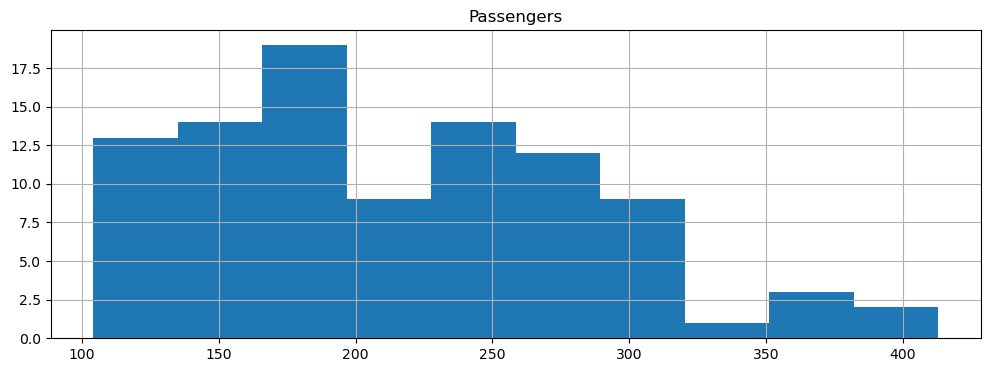

In [17]:
air.hist(figsize=(12,4))

# Density Plot


<AxesSubplot:ylabel='Density'>

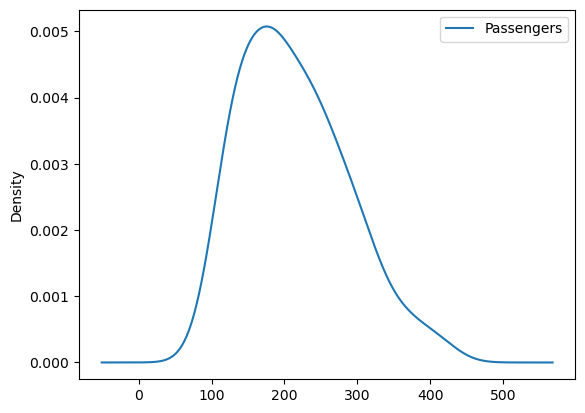

In [18]:
air.plot(kind='kde')

# 1- Moving Average

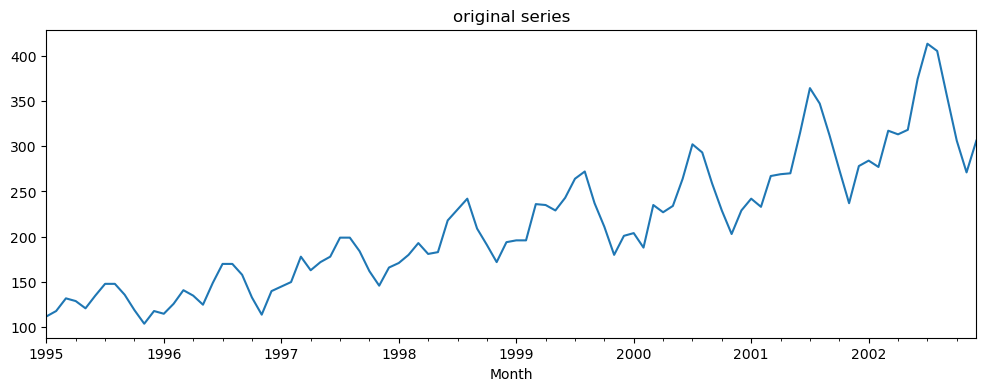

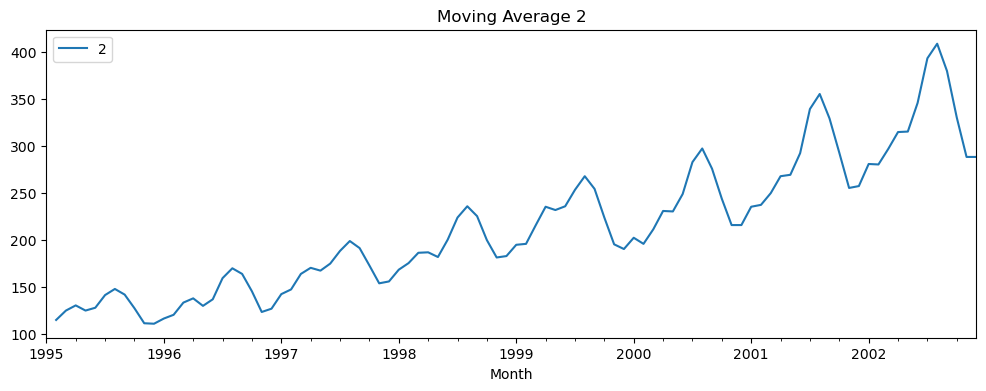

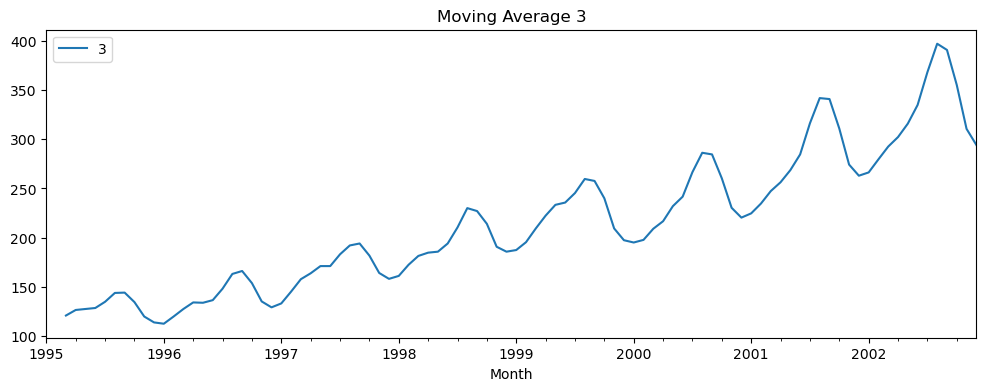

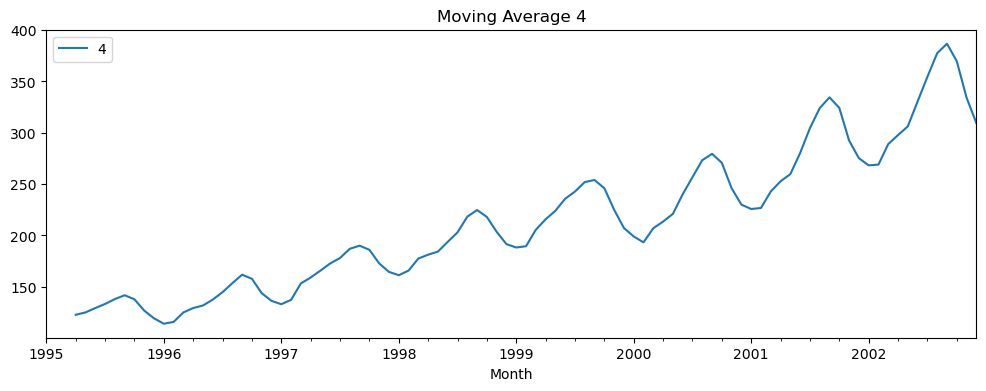

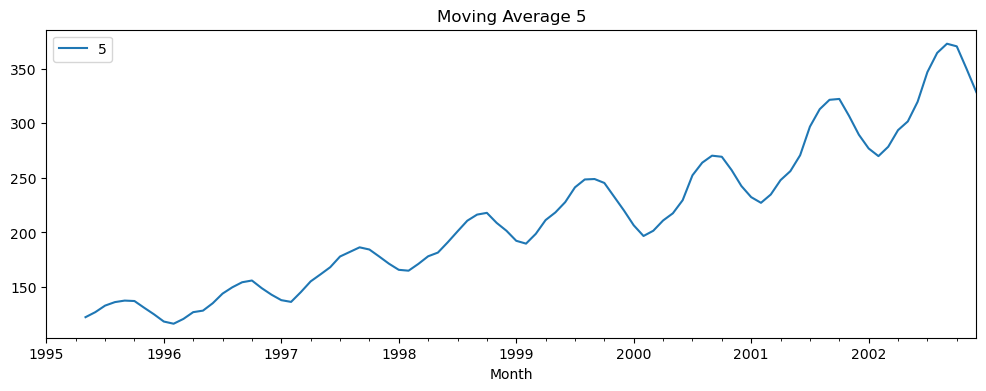

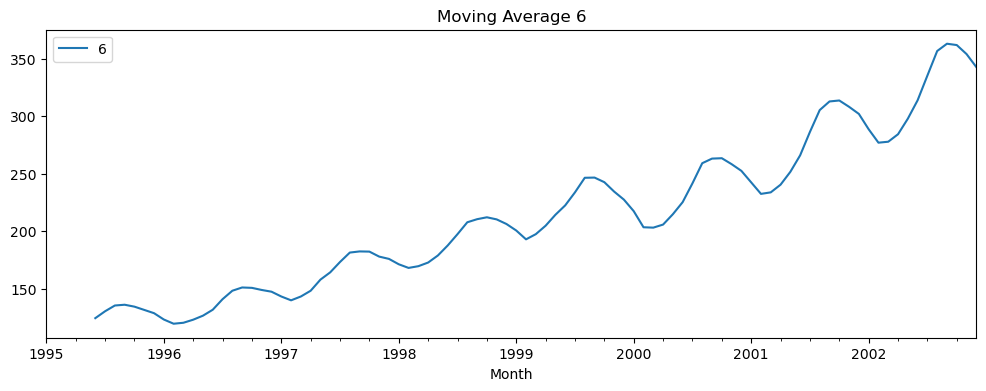

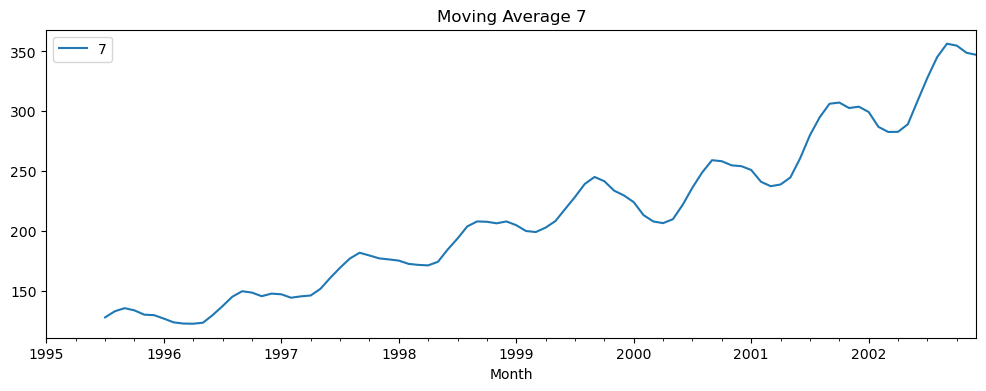

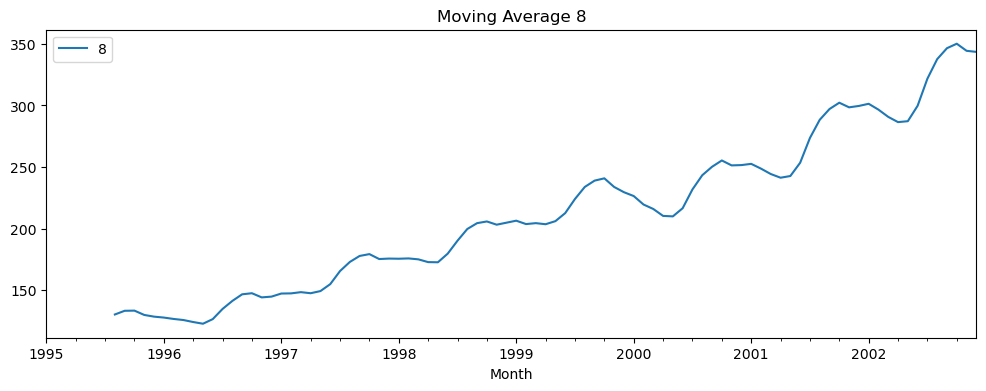

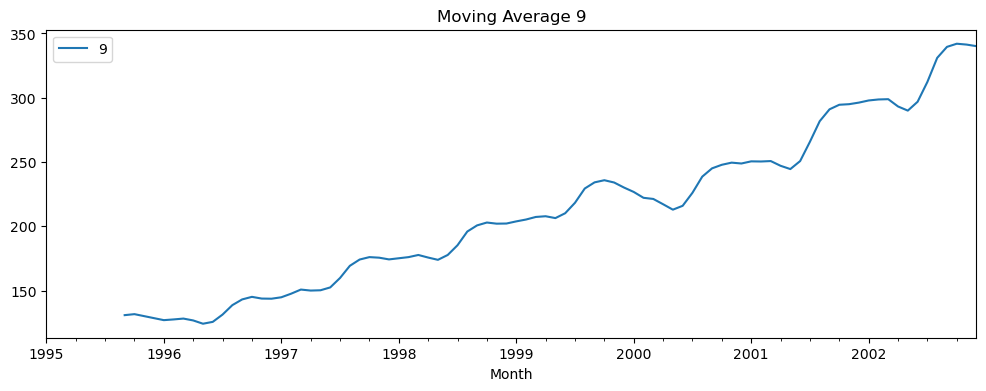

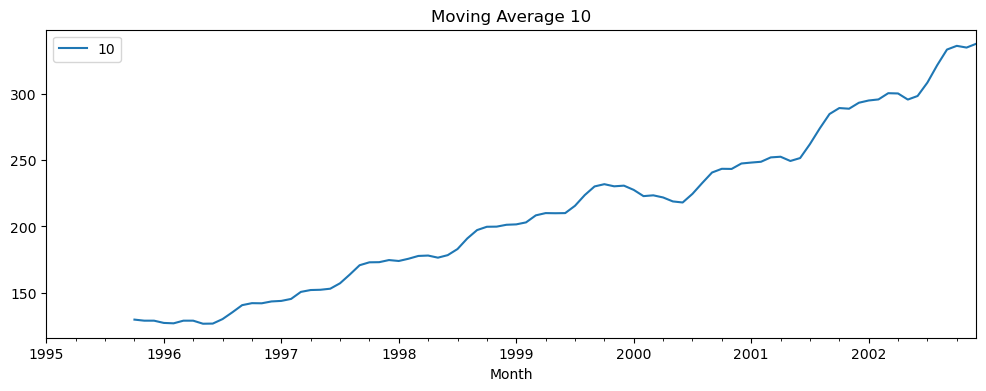

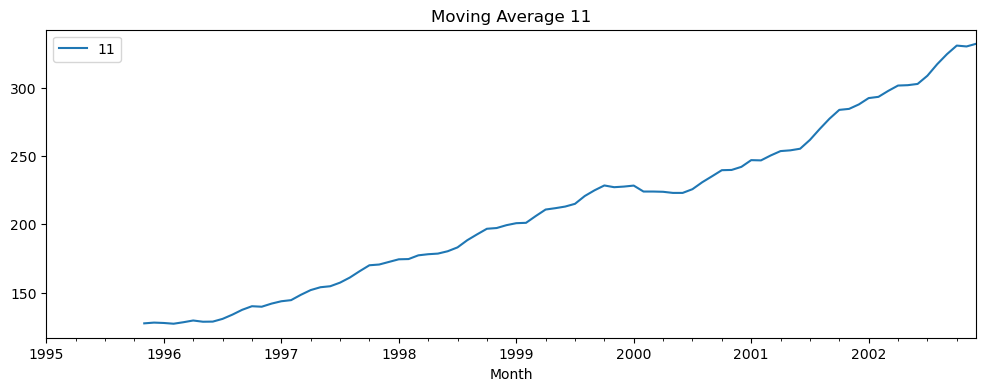

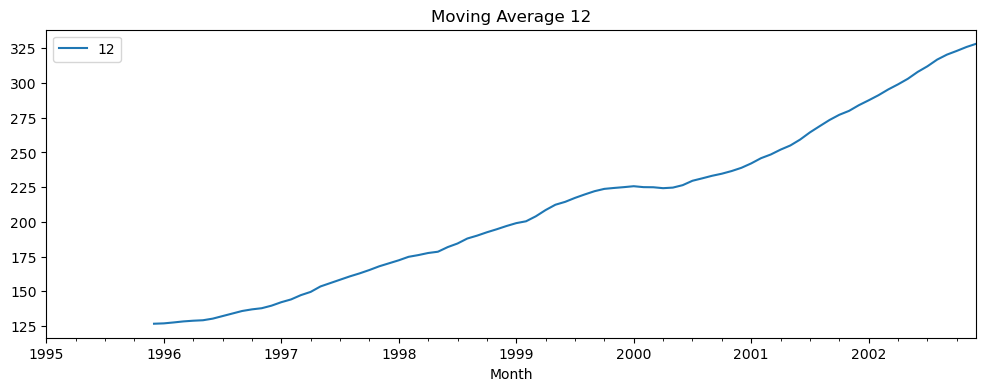

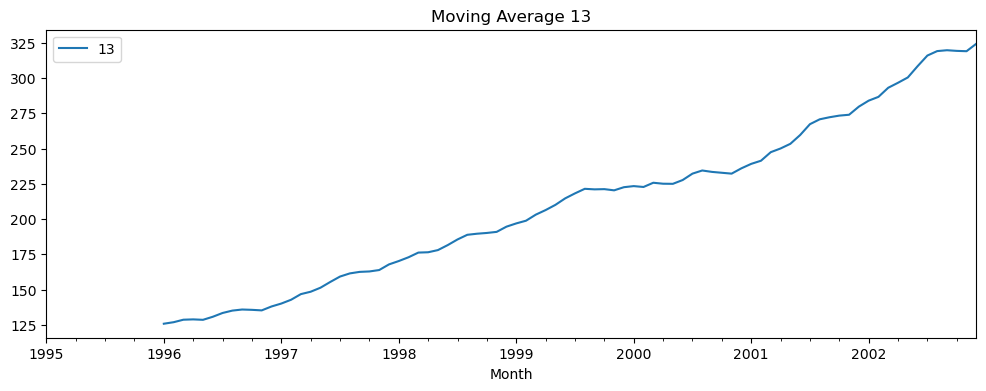

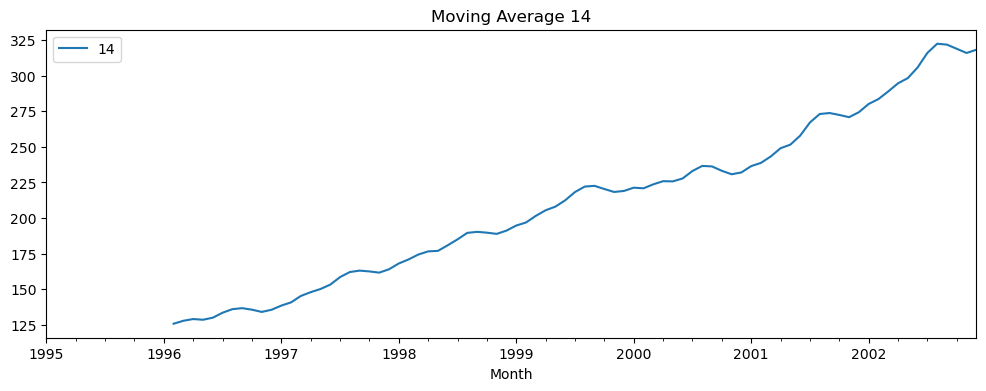

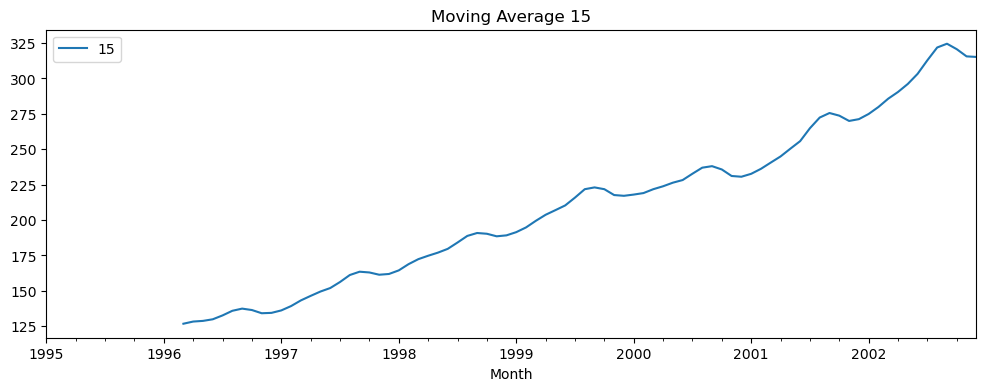

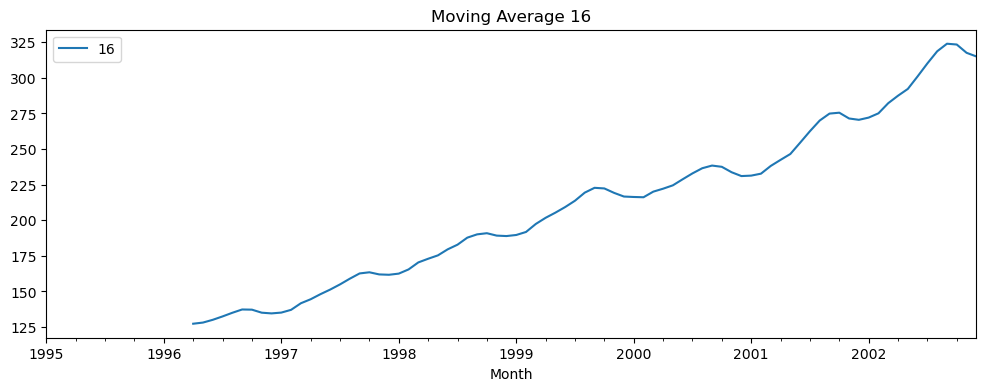

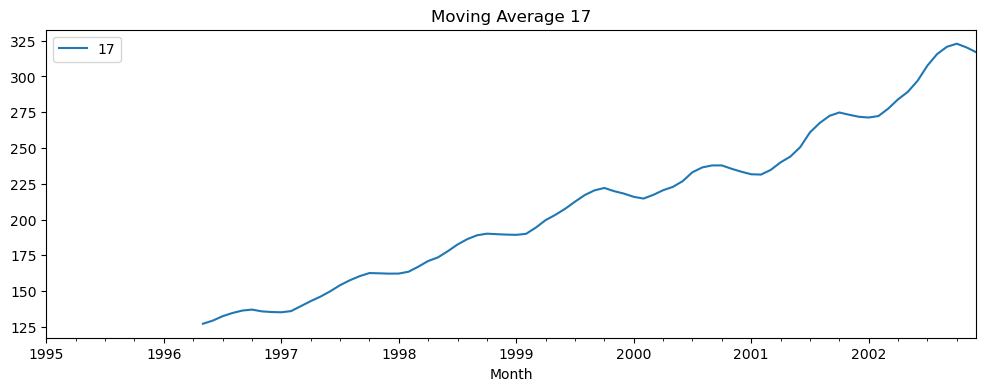

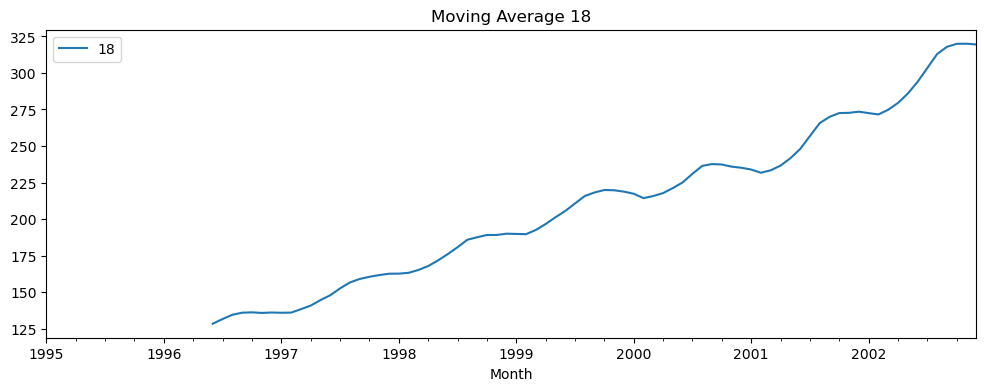

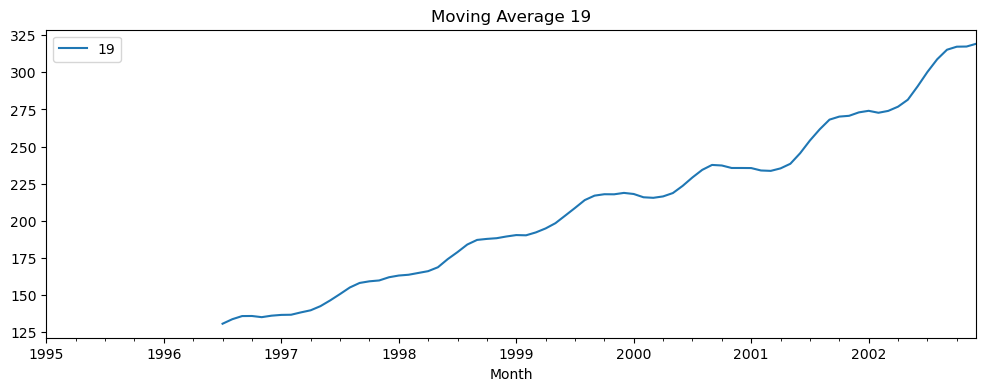

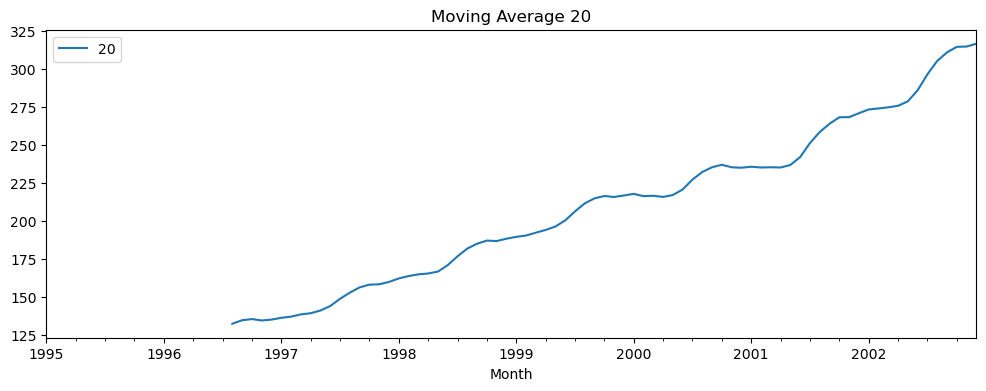

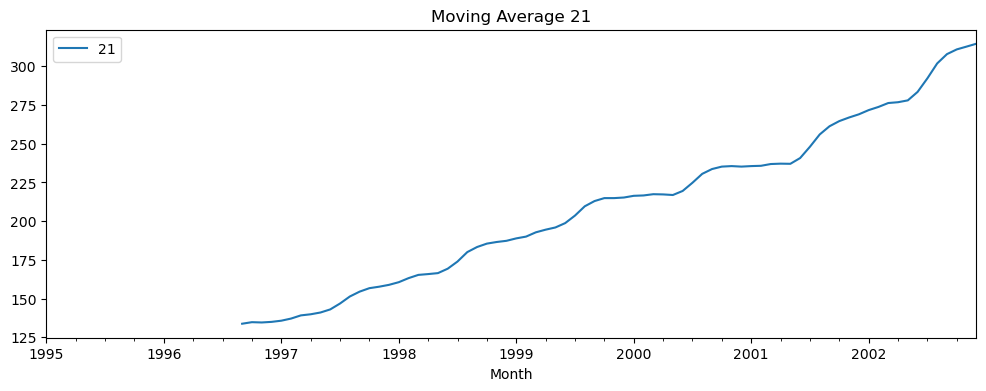

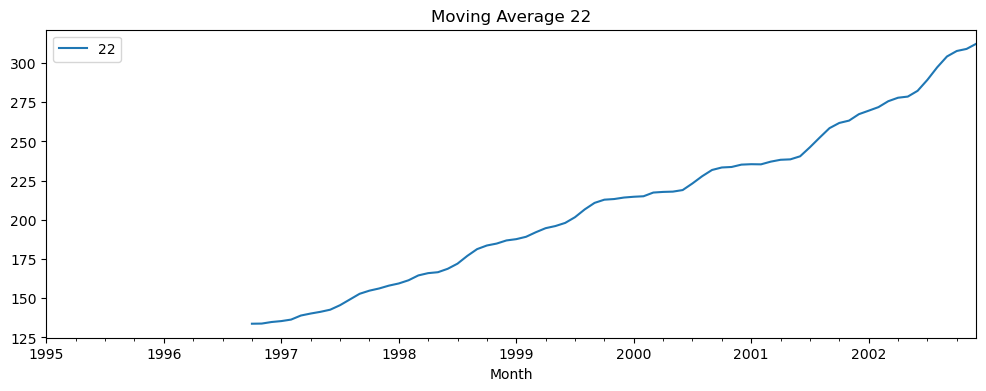

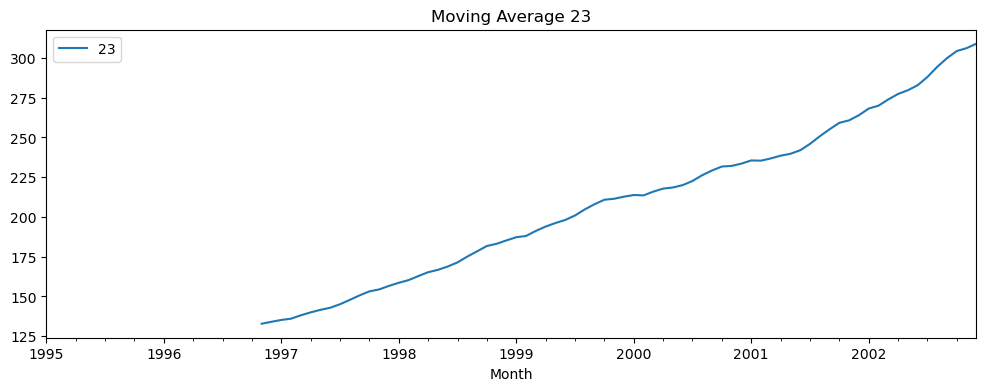

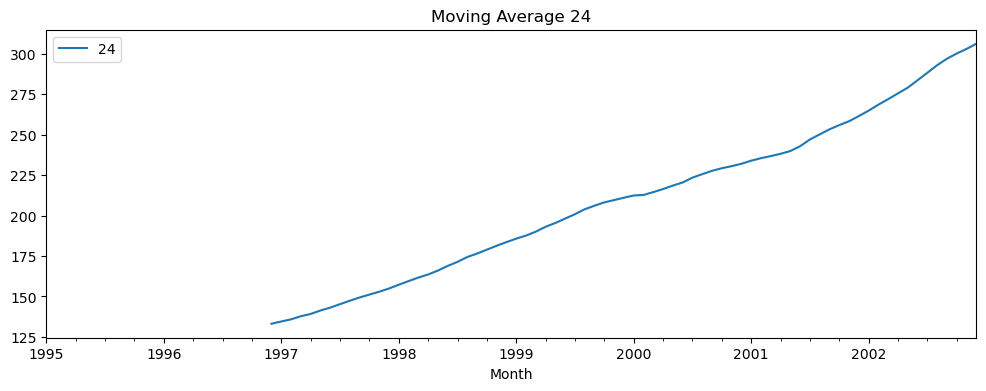

In [69]:
plt.figure(figsize=(12,4))
air.Passengers.plot(label="org")
plt.title("original series")

for i in range(2,25):
    plt.figure(figsize=(12,4))


    air["Passengers"].rolling(i).mean().plot(label=str(i))
    plt.title("Moving Average "+str(i))
    plt.legend(loc='best')
    plt.show()

#  Time Series Decomposition Plot

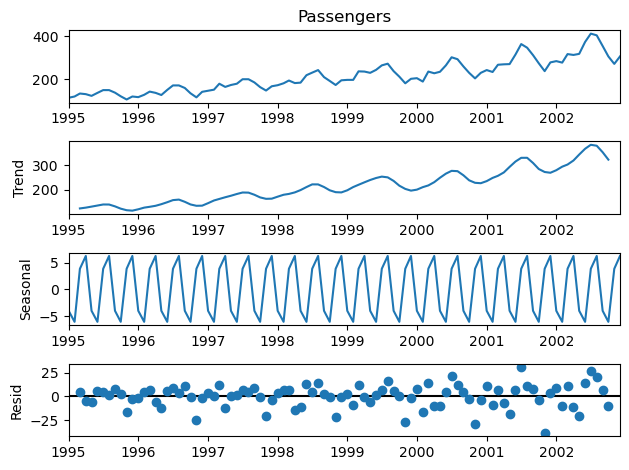

In [21]:
decompose_ts_add = seasonal_decompose(air.Passengers,period=4)
decompose_ts_add.plot()
plt.show()

# Divinding The Data into Training and Tesing Data


In [70]:
Train = air.head(70)
Test = air.tail(26)

In [42]:
len(air)

96

In [43]:
print("Total records in train set:",len(Train))
print("Total records in test set:",len(Test))


Total records in train set: 70
Total records in test set: 26


In [44]:
df_mva=air.copy()

In [47]:
train_len=70

In [48]:
df_mva['ma_forecast'] = df_mva['Passengers'].rolling(12).mean()

In [49]:
df_mva['ma_forecast'][train_len:] = df_mva['ma_forecast'][train_len-1]

In [50]:
from sklearn.metrics import mean_squared_error

In [51]:
## Calculating RMSE and MAPE
rmse_ma = mean_squared_error(Test['Passengers'],df_mva['ma_forecast'][train_len:],squared=False).round(2)
rmse_ma

83.22

#  2-Simple Exponential Smoothing

In [52]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [53]:
ses_model = SimpleExpSmoothing(Train["Passengers"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])

In [55]:
rmse_ses = mean_squared_error(Test['Passengers'],pred_ses,squared=False).round(2)
rmse_ses

72.31

# 3- Holt's Method

In [56]:
from statsmodels.tsa.holtwinters import Holt

In [57]:
holt_model = Holt(Train["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_holt = holt_model.predict(start = Test.index[0],end = Test.index[-1])

In [58]:
rmse_holt = mean_squared_error(Test['Passengers'],pred_holt,squared=False).round(2)
rmse_holt

130.57

# 4- Holt's Exponential Sommthing

# 4.1- Additive Method

In [59]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

In [60]:
hes_add_add = ExponentialSmoothing(Train['Passengers'],seasonal="add",trend="add",seasonal_periods=12).fit()
pred_hes_add_add = hes_add_add.predict(start = Test.index[0],end = Test.index[-1])

In [61]:
rmse_hes_add_add = mean_squared_error(Test['Passengers'],pred_hes_add_add,squared=False).round(2)
rmse_hes_add_add

42.76

# 4.2-Multiplicative Method

In [62]:
hes_mul_add = ExponentialSmoothing(Train['Passengers'],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hes_mul_add = hes_mul_add.predict(start = Test.index[0],end = Test.index[-1])

In [63]:
rmse_hes_mul_add = mean_squared_error(Test['Passengers'],pred_hes_mul_add,squared=False).round(2)
rmse_hes_mul_add

34.85

# 5-ARIMA Model

# Visualization of ACF(Auto Correlation Function) plot 

In [71]:
from statsmodels.graphics.tsaplots import plot_acf

# Show Autocorrelation upto lag 20


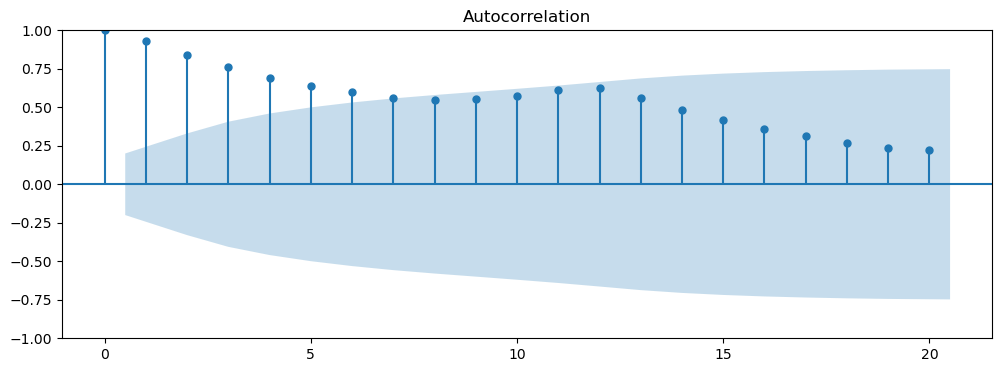

In [73]:
plt.figure(figsize=(12,4))
acf_plot = plot_acf( air['Passengers'],ax=plt.gca(),lags=20)
plt.show()

ACF plot: it is merely a bar chart of the coefficients of correlation between a time series and lags of itself. 
and the plot is showing that THE AUTO CORRELATION IS SIGNIFICANT FOR LAG -1

#  Visualization of PACF(Partial Auto Correlation Function) plot 

In [74]:
from statsmodels.graphics.tsaplots import plot_pacf

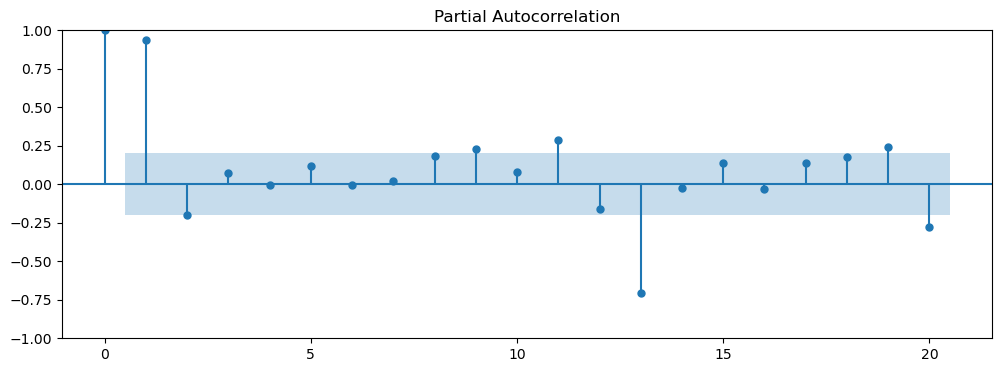

In [75]:
plt.figure(figsize=(12,4))
pacf_plot = plot_pacf( air['Passengers'],ax=plt.gca(),lags=20)
plt.show()

The PACF plot is a plot of the partial correlation coefficients between the series and lags of itself.

In [64]:
from statsmodels.tsa.arima.model import ARIMA
import warnings

warnings.filterwarnings("ignore")

In [65]:
arima = ARIMA(Train['Passengers'], order=(1,1,1)).fit()
pred_arima= arima.predict(start = Test.index[0],end = Test.index[-1])

In [66]:
rmse_arima = mean_squared_error(Test['Passengers'],pred_arima,squared=False).round(2)
rmse_arima

90.22

# Now Selecting Best Model By comparing RMSE of Different Model

In [67]:
models=['simple_moving_average','simple_expo_smoothing','Holt','Holt_additive','Holt_multiplicative','ARIMA']
rmse=[rmse_ma,rmse_ses,rmse_holt,rmse_hes_add_add,rmse_hes_mul_add,rmse_arima]
d={'Models':models,'Rmse':rmse}
df_model=pd.DataFrame(d)
df_model

,Models,Rmse
0,simple_moving_average,83.22
1,simple_expo_smoothing,72.31
2,Holt,130.57
3,Holt_additive,42.76
4,Holt_multiplicative,34.85
5,ARIMA,90.22


In [68]:
df_model.sort_values(by='Rmse')

,Models,Rmse
4,Holt_multiplicative,34.85
3,Holt_additive,42.76
1,simple_expo_smoothing,72.31
0,simple_moving_average,83.22
5,ARIMA,90.22
2,Holt,130.57


# So after analizing the RMSE value we come to the conclusion that our Best model is HOLT's Multiplicative model because it is giving us lowest RMSE value

# Now Doing Forecasting for next 50 time period using HOLT'S MULTIPLICATIVE MODEL

# Forecasting for next 50 time periods


In [80]:
hes_mul_add.forecast(50)

2000-11-01    200.700586
2000-12-01    228.071284
2001-01-01    230.913512
2001-02-01    231.807941
2001-03-01    270.501846
2001-04-01    259.462723
2001-05-01    258.374747
2001-06-01    286.545128
2001-07-01    316.381201
2001-08-01    318.000425
2001-09-01    282.065250
2001-10-01    249.128767
2001-11-01    217.920538
2001-12-01    247.500700
2002-01-01    250.446391
2002-02-01    251.279224
2002-03-01    293.065379
2002-04-01    280.956040
2002-05-01    279.631202
2002-06-01    309.958638
2002-07-01    342.057772
2002-08-01    343.635038
2002-09-01    304.651336
2002-10-01    268.945265
2002-11-01    235.140489
2002-12-01    266.930117
2003-01-01    269.979271
2003-02-01    270.750507
2003-03-01    315.628913
2003-04-01    302.449358
2003-05-01    300.887658
2003-06-01    333.372148
2003-07-01    367.734343
2003-08-01    369.269651
2003-09-01    327.237421
2003-10-01    288.761763
2003-11-01    252.360441
2003-12-01    286.359534
2004-01-01    289.512150
2004-02-01    290.221791
